In [23]:
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value_norm
from funzioni import polarizzazione 
from funzioni import allpixel_norm


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
#costants
k = 1.38e-23
h = 6.626e-34
T=20
c=10e8
nu_I_D=545
nu_I_S=0.408
nu_P_D=353
nu_P_S=23
beta_D=1.54
beta_S=-3

In [26]:
#parameters
frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])
pixels = np.arange(0,192)
Stokes = np.array([0,1,2])
ref= ([nu_I_D,nu_I_S,nu_P_D,nu_P_S])

In [27]:
Sky_D0=pysm3.Sky(nside=4, preset_strings=["d0"])
Sky_D1=pysm3.Sky(nside=4, preset_strings=["d1"])
Sky_D2=pysm3.Sky(nside=4, preset_strings=["d2"])


In [28]:
Sky_S0=pysm3.Sky(nside=4, preset_strings=["s0"])
Sky_S1=pysm3.Sky(nside=4, preset_strings=["s1"])
Sky_S2=pysm3.Sky(nside=4, preset_strings=["s2"])

In [29]:
I_D0 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_D0[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_D0)

In [30]:
I_D1 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_D1[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_D1)

In [31]:
I_D2 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_D2[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_D2)

In [32]:
I_S0 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_S0[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_S0)

In [33]:
I_S1 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_S1[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_S1)

In [34]:
I_S2 = np.zeros([len(frequencies),len(pixels)])
for i,pix_i in enumerate(pixels):    
    I_S2[:,i]= get_pixel_value_norm (frequencies,ref_frequencies=ref[0], npix=pix_i, St=Stokes[0], sky=Sky_S2)

Text(0, 0.5, '$\\mu$$K_{RJ}$')

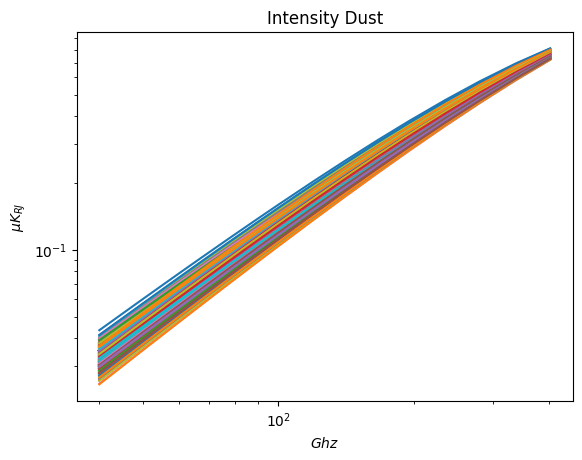

In [35]:
plt.plot(frequencies,I_D0,'-',label="I_D0")
plt.plot(frequencies,I_D1,'-',label="I_D1")
plt.plot(frequencies,I_D2,'-',label="I_D2")

plt.title("Intensity Dust")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
#plt.legend()




Text(0, 0.5, '$\\mu$$K_{RJ}$')

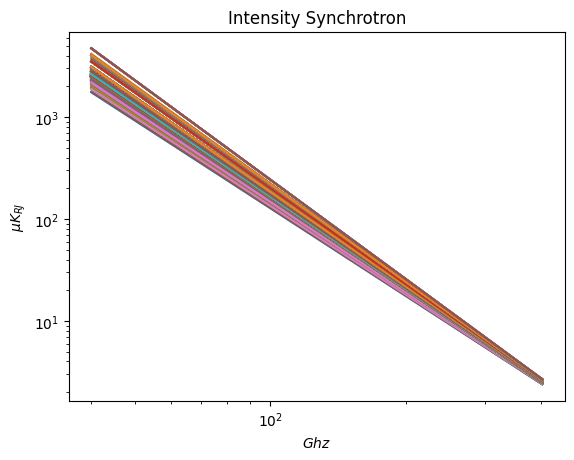

In [36]:
plt.plot(frequencies,I_S0,'-',label="I_S0")
plt.plot(frequencies,I_S1,'-',label="I_S1")
plt.plot(frequencies,I_S2,'-',label="I_S2")
plt.title("Intensity Synchrotron")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
#plt.legend()